In [114]:
import numpy as np

In [123]:
E = [400, 600, 500] # suppliers capacity
D = [300, 400, 500, 350] # plants capacity
W = [150, 150, 350, 500] # DCs capacity
d = [200, 150, 200, 250, 100] # customers demand

In [124]:
g = [1150, 1200, 900, 1250] # plants operation $
v = [900, 1050, 1300, 1100] # DCs operation $

In [125]:
# suppliers-plants transportation + purchasing $
t = np.array([
    [6, 5, 6, 7],
    [4, 2, 7, 6],
    [4, 3, 7, 4]
])

In [126]:
# plants-DCs transportation $
a = np.array([
    [4, 4, 2, 1],
    [3, 2, 2, 4],
    [4, 6, 5, 3],
    [8, 3, 7, 2]
])

In [127]:
# DCs-customers transportation $
c = np.array([
    [7, 4, 7, 7, 6],
    [9, 2, 3, 8, 9],
    [6, 7, 3, 8, 3],
    [3, 7, 9, 4, 9]
])

In [128]:
ch = [3, 8, 5, 2, 1, 7, 4, 6] # chromosome

In [105]:
def transport(d, W, q, i, j, split_delivery):
    items = min(d[i], W[j])
    if split_delivery or not items < d[i]:
        W[j] -= items
        d[i] -= items
        q[j,i] += items
        if items > 0:
            print(f'Assign {items} from Plant {j+1} to Customer {i+1}')

def DCs_customers_transportation_tree(d, W, c, v, split_delivery=False, 
                                      priority='left'):
    '''
    d: customers demand [i]
    W: DCs capacity [j]
    c: DCs-customers transportation $ [j,i]
    v: chromosome substring [j]
    '''
    J = len(W) # num DCs
    I = len(d) # num customers
    
    q = np.zeros((J,I)) # DC to customer transportation units
    z = np.zeros(J) # used DCs flag
    if priority == 'left':
        for j in sorted(range(J), key=lambda x: v[x], reverse=True):
            for i in sorted(range(I), key=lambda x: c[j,x]):
                transport(d, W, q, i, j, split_delivery)
    else:
        for i in sorted(range(I), key=lambda x: v[x], reverse=True):
            for j in sorted(range(J), key=lambda x: c[x,i]):
                transport(d, W, q, i, j, split_delivery)  
    z = np.array(q.sum(1) > 0, dtype='int')
    return q, z

In [84]:
q, z = DCs_customers_transportation_tree(d[:], W[:], c[:], v[4:])

Assign 150 from Plant 2 to Customer 2
Assign 200 from Plant 4 to Customer 1
Assign 250 from Plant 4 to Customer 4
Assign 200 from Plant 3 to Customer 3
Assign 100 from Plant 3 to Customer 5


In [85]:
q

array([[  0.,   0.,   0.,   0.,   0.],
       [  0., 150.,   0.,   0.,   0.],
       [  0.,   0., 200.,   0., 100.],
       [200.,   0.,   0., 250.,   0.]])

In [86]:
z

array([0, 1, 1, 1])

In [90]:
q.sum(1)

array([  0., 150., 300., 450.])

In [91]:
v[:4]

[3, 8, 5, 2]

In [106]:
q, z = DCs_customers_transportation_tree(d[:], W[:], c[:], v[4:])

Assign 150 from Plant 2 to Customer 2
Assign 200 from Plant 4 to Customer 1
Assign 250 from Plant 4 to Customer 4
Assign 200 from Plant 3 to Customer 3
Assign 100 from Plant 3 to Customer 5


In [107]:
f, p = DCs_customers_transportation_tree(q.sum(1), D[:], a[:], v[:4], 
                                         split_delivery=True)

Assign 150.0 from Plant 2 to Customer 2
Assign 250.0 from Plant 2 to Customer 3
Assign 450.0 from Plant 3 to Customer 4
Assign 50.0 from Plant 3 to Customer 3


In [108]:
f

array([[  0.,   0.,   0.,   0.],
       [  0., 150., 250.,   0.],
       [  0.,   0.,  50., 450.],
       [  0.,   0.,   0.,   0.]])

In [109]:
p

array([0, 1, 1, 0])

In [110]:
b, s = DCs_customers_transportation_tree(f.sum(1), E[:], t[:], v[:4],
                                         split_delivery=True,
                                         priority='right')

Assign 400.0 from Plant 2 to Customer 2
Assign 400.0 from Plant 1 to Customer 3
Assign 100.0 from Plant 2 to Customer 3


In [111]:
b

array([[  0.,   0., 400.,   0.],
       [  0., 400., 100.,   0.],
       [  0.,   0.,   0.,   0.]])

In [112]:
s

array([1, 1, 0])

In [113]:
f.sum(1)

array([  0., 400., 500.,   0.])

## Checkpoint

In [129]:
from utils import transportation_tree
q, z = transportation_tree(    d[:], W[:], c[:], ch[4:])
f, p = transportation_tree(q.sum(1), D[:], a[:], ch[:4], split_delivery=True)
b, s = transportation_tree(f.sum(1), E[:], t[:], ch[:4], split_delivery=True, priority='right')

Assign 150 from Plant 2 to Customer 2
Assign 200 from Plant 4 to Customer 1
Assign 250 from Plant 4 to Customer 4
Assign 200 from Plant 3 to Customer 3
Assign 100 from Plant 3 to Customer 5
Assign 150.0 from Plant 2 to Customer 2
Assign 250.0 from Plant 2 to Customer 3
Assign 450.0 from Plant 3 to Customer 4
Assign 50.0 from Plant 3 to Customer 3
Assign 400.0 from Plant 2 to Customer 2
Assign 400.0 from Plant 1 to Customer 3
Assign 100.0 from Plant 2 to Customer 3


In [132]:
b

array([[  0.,   0., 400.,   0.],
       [  0., 400., 100.,   0.],
       [  0.,   0.,   0.,   0.]])

In [133]:
t

array([[6, 5, 6, 7],
       [4, 2, 7, 6],
       [4, 3, 7, 4]])

In [136]:
def evaluate_solution(b, t, p, g, f, a, z, v, q, c):
    return np.multiply(b, t).sum() + \
           np.multiply(p, g).sum() + \
           np.multiply(f, a).sum() + \
           np.multiply(z, v).sum() + \
           np.multiply(q, c).sum()    

In [137]:
evaluate_solution(b, t, p, g, f, a, z, v, q, c)

14650.0

In [140]:
q

array([[  0.,   0.,   0.,   0.,   0.],
       [  0., 150.,   0.,   0.,   0.],
       [  0.,   0., 200.,   0., 100.],
       [200.,   0.,   0., 250.,   0.]])

In [198]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

{('Sup1', 'Pla3'): Text(1.5,2.75,'400.0'),
 ('Sup2', 'Pla2'): Text(1.5,2.75,'400.0'),
 ('Sup2', 'Pla3'): Text(1.5,2.25,'100.0'),
 ('Pla2', 'DC2'): Text(2.5,3,'150.0'),
 ('Pla2', 'DC3'): Text(2.5,2.5,'250.0'),
 ('Pla3', 'DC3'): Text(2.5,2,'50.0'),
 ('Pla3', 'DC4'): Text(2.5,1.5,'450.0'),
 ('DC2', 'Cus2'): Text(3.5,3.25,'150.0'),
 ('DC3', 'Cus3'): Text(3.5,2.25,'200.0'),
 ('DC3', 'Cus5'): Text(3.5,1.25,'100.0'),
 ('DC4', 'Cus1'): Text(3.5,2.75,'200.0'),
 ('DC4', 'Cus4'): Text(3.5,1.25,'250.0')}

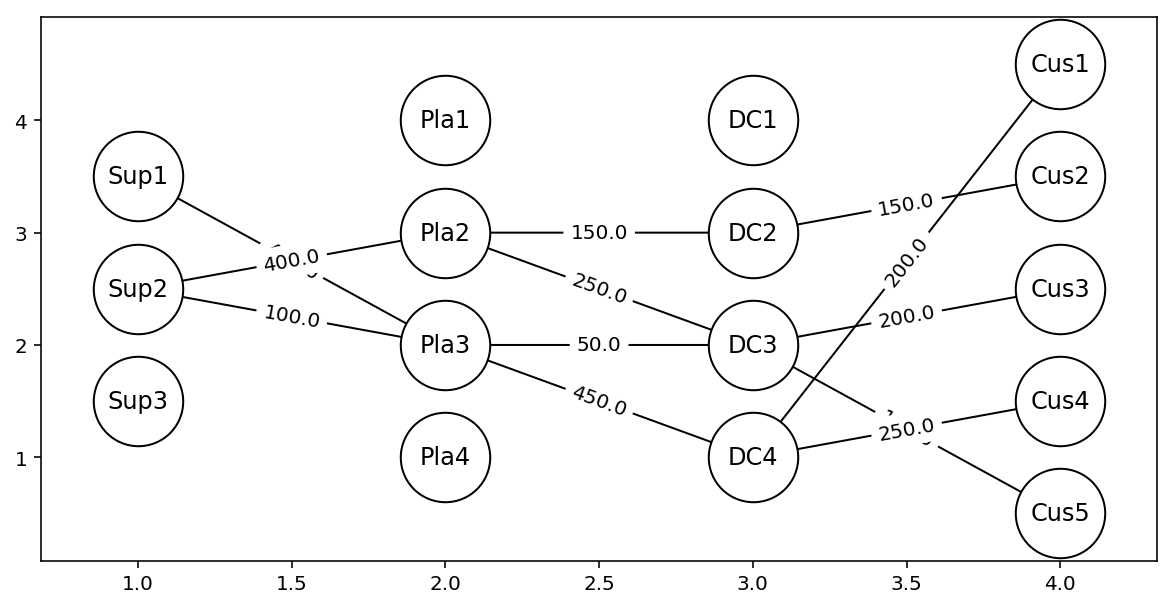

In [216]:
import networkx as nx
G = nx.DiGraph()
plt.figure(figsize=(10,5))

v_space = max(b.shape + f.shape + q.shape)

for i in range(b.shape[0]):
    G.add_node(f'Sup{i+1}', pos=(1, v_space - (v_space-b.shape[0]+1)/2 - i))

for i in range(b.shape[1]):
    G.add_node(f'Pla{i+1}', pos=(2, v_space - (v_space-b.shape[1]+1)/2 - i))
    
for i in range(f.shape[1]):
    G.add_node(f'DC{i+1}' , pos=(3, v_space - (v_space-f.shape[1]+1)/2 - i))
        
for i in range(q.shape[1]):
    G.add_node(f'Cus{i+1}', pos=(4, v_space - (v_space-q.shape[1]+1)/2 - i))

for i in range(len(b)):
    for j in range(len(b[i])):
        if b[i][j] > 0:
            G.add_edge(f'Sup{i+1}', f'Pla{j+1}', transp=b[i][j])
            
for i in range(len(f)):
    for j in range(len(f[i])):
        if f[i][j] > 0:
            G.add_edge(f'Pla{i+1}', f'DC{j+1}', transp=f[i][j])
    
for i in range(len(q)):
    for j in range(len(q[i])):
        if q[i][j] > 0:
            G.add_edge(f'DC{i+1}', f'Cus{j+1}', transp=q[i][j])
            
pos = nx.get_node_attributes(G, 'pos')
edge_labels = nx.get_edge_attributes(G, 'transp')
nx.draw_networkx_nodes(G, pos, node_size=2000, edgecolors='black', 
                       node_color='white')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, 
                             label_pos=0.5)